In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/apple/Desktop/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(data_path)

## Numerical variable vs Numerical variable: 
###    Pearson correlation coefficient matrix

In [3]:
numerical_data = data.select_dtypes(include=[np.number])

corr_matrix = numerical_data.corr()

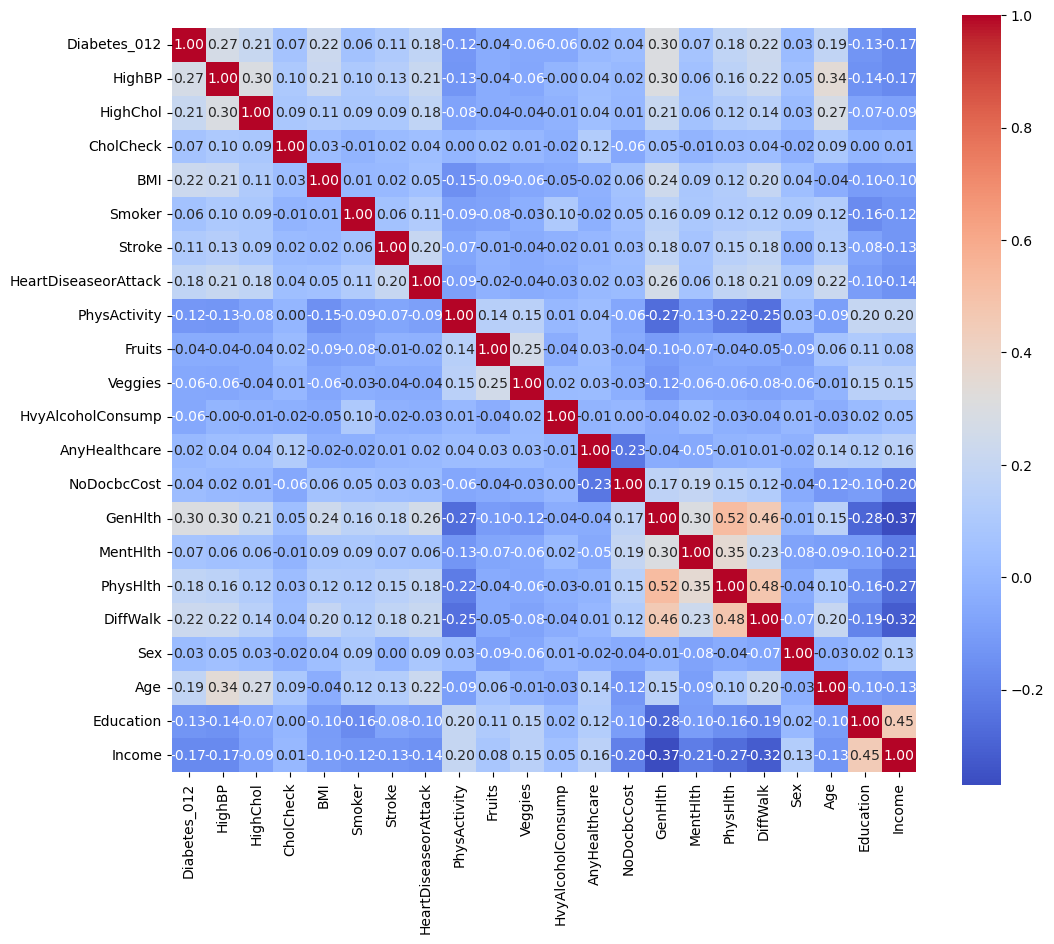

In [4]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.show()

In [14]:
numerical_data = data[['BMI', 'PhysHlth']]

corr_matrix = numerical_data.corr()

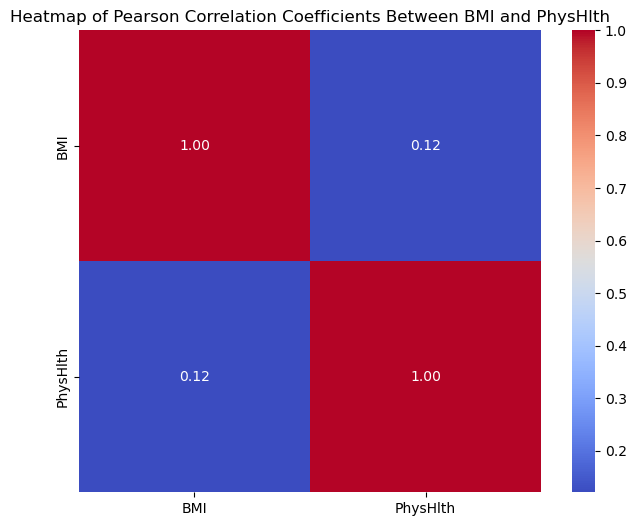

In [15]:
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Pearson Correlation Coefficients Between BMI and PhysHlth')

plt.show()

## Numerical variable vs Categorical variable: 
###    ANOVA

In [11]:
from scipy import stats

In [13]:
numerical_vars = ['BMI', 'PhysHlth']

categorical_vars = data.columns.drop(numerical_vars)

anova_results = {}
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        grouped_data = data.groupby(cat_var)[num_var].apply(list)
        anova_result = stats.f_oneway(*grouped_data)
        anova_results[(cat_var, num_var)] = (anova_result.statistic, anova_result.pvalue)

for variables, (stat, pvalue) in anova_results.items():
    print(f'ANOVA between {variables[0]} (Categorical) and {variables[1]} (Numerical): F-statistic = {stat}, p-value = {pvalue}')

ANOVA between Diabetes_012 (Categorical) and BMI (Numerical): F-statistic = 6768.361066999288, p-value = 0.0
ANOVA between Diabetes_012 (Categorical) and PhysHlth (Numerical): F-statistic = 4078.699854188424, p-value = 0.0
ANOVA between HighBP (Categorical) and BMI (Numerical): F-statistic = 12144.9895707575, p-value = 0.0
ANOVA between HighBP (Categorical) and PhysHlth (Numerical): F-statistic = 6768.796239593946, p-value = 0.0
ANOVA between HighChol (Categorical) and BMI (Numerical): F-statistic = 2922.5786745141754, p-value = 0.0
ANOVA between HighChol (Categorical) and PhysHlth (Numerical): F-statistic = 3816.896020811423, p-value = 0.0
ANOVA between CholCheck (Categorical) and BMI (Numerical): F-statistic = 302.21385517341355, p-value = 1.1878735693611343e-67
ANOVA between CholCheck (Categorical) and PhysHlth (Numerical): F-statistic = 256.3819075283716, p-value = 1.1259725587387978e-57
ANOVA between Smoker (Categorical) and BMI (Numerical): F-statistic = 48.350930988251825, p-val

## Categorical variable vs Categorical variable: 
###    Contingency Table + Chi-Square Test

In [9]:
from scipy.stats import chi2_contingency

categorical_vars = data.columns.drop(['BMI', 'PhysHlth'])

In [10]:
chi_square_results = {}

for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        table = pd.crosstab(data[categorical_vars[i]], data[categorical_vars[j]])
        chi2, p, dof, ex = chi2_contingency(table)
        chi_square_results[(categorical_vars[i], categorical_vars[j])] = (chi2, p)

for variables, (chi2, p) in chi_square_results.items():
    print(f"Between {variables[0]} and {variables[1]}: Chi2 = {chi2}, p-value = {p}")

Between Diabetes_012 and HighBP: Chi2 = 18794.644052016425, p-value = 0.0
Between Diabetes_012 and HighChol: Chi2 = 11258.920399414841, p-value = 0.0
Between Diabetes_012 and CholCheck: Chi2 = 1173.749357770035, p-value = 1.3291236675197173e-255
Between Diabetes_012 and Smoker: Chi2 = 1010.5117511111928, p-value = 3.7167324294119075e-220
Between Diabetes_012 and Stroke: Chi2 = 2916.75197962113, p-value = 0.0
Between Diabetes_012 and HeartDiseaseorAttack: Chi2 = 8244.88910662167, p-value = 0.0
Between Diabetes_012 and PhysActivity: Chi2 = 3789.3014625427318, p-value = 0.0
Between Diabetes_012 and Fruits: Chi2 = 454.3470587241542, p-value = 2.1867028126650155e-99
Between Diabetes_012 and Veggies: Chi2 = 893.8419053866104, p-value = 8.029645985781328e-195
Between Diabetes_012 and HvyAlcoholConsump: Chi2 = 850.3240478355594, p-value = 2.2619296719502035e-185
Between Diabetes_012 and AnyHealthcare: Chi2 = 69.07797672213422, p-value = 9.997880563068128e-16
Between Diabetes_012 and NoDocbcCos

In [16]:
def calculate_chi_square(df, cols):
    results = {}
    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results[(col1, col2)] = p
    return results

In [17]:
categorical_cols = [col for col in data.columns if col not in ['BMI', 'PhysHlth']]

In [18]:
chi_square_results = calculate_chi_square(data, categorical_cols)

for variables, p_value in chi_square_results.items():
    print(f"Variables: {variables}, P-value: {p_value}")

Variables: ('Diabetes_012', 'HighBP'), P-value: 0.0
Variables: ('Diabetes_012', 'HighChol'), P-value: 0.0
Variables: ('Diabetes_012', 'CholCheck'), P-value: 1.3291236675197173e-255
Variables: ('Diabetes_012', 'Smoker'), P-value: 3.7167324294119075e-220
Variables: ('Diabetes_012', 'Stroke'), P-value: 0.0
Variables: ('Diabetes_012', 'HeartDiseaseorAttack'), P-value: 0.0
Variables: ('Diabetes_012', 'PhysActivity'), P-value: 0.0
Variables: ('Diabetes_012', 'Fruits'), P-value: 2.1867028126650155e-99
Variables: ('Diabetes_012', 'Veggies'), P-value: 8.029645985781328e-195
Variables: ('Diabetes_012', 'HvyAlcoholConsump'), P-value: 2.2619296719502035e-185
Variables: ('Diabetes_012', 'AnyHealthcare'), P-value: 9.997880563068128e-16
Variables: ('Diabetes_012', 'NoDocbcCost'), P-value: 9.815789822340756e-87
Variables: ('Diabetes_012', 'GenHlth'), P-value: 0.0
Variables: ('Diabetes_012', 'MentHlth'), P-value: 0.0
Variables: ('Diabetes_012', 'DiffWalk'), P-value: 0.0
Variables: ('Diabetes_012', 'Sex

In [20]:
contingency_table = pd.crosstab(data['Diabetes_012'], data['Smoker'])

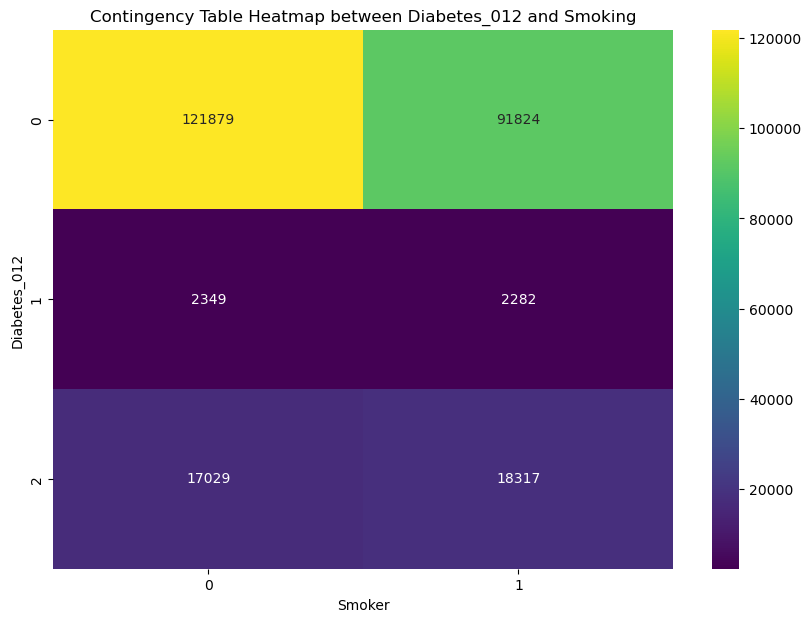

In [21]:
plt.figure(figsize=(10, 7))  
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Contingency Table Heatmap between Diabetes_012 and Smoking')
plt.ylabel('Diabetes_012')
plt.xlabel('Smoker')
plt.show()